### 1. Value Function of  states for given policy using Bellman Equation

   - Reward is a function of state
   - Action Space = [left, right, up, down]
   - P(s --> s') is a function of s. $P^{a}_{ss'} = P_s$
   - We have deterministic policy i.e. Agent will take a fixed action policy(s) with probabililty 1, when agent is in state s.
   
##### Goal is to observe how value function changes over time.

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
class Environment:
    def __init__(self, n, m):
        self.rowNum = n
        self.colNum = m
        self.action = ['l', 'r','u', 'd']
        self.actionToIndex = {'l':0, 'r':1, 'u':2, 'd':3}
        
        #reward for R: S -> relaNumber
        self.reward = np.array([[0, 0.45, 1, 0.9]
                               ,[0.23, 1.25, 0, 0]
                               ,[0, 0.45, 0.75, 0]
                               ,[0.85, 1.5, 2.5, 0.85]])
        
        #Initial Policy for policy iteration  
        #r: right, l:left, u:up, d:down
        self.policy =  np.array([["r", "d", "d", "l"]
                                ,["r", "d", "d", "d"]
                                ,["d", "d", "d", "d"]
                                ,["r", "r", "l", "l"]])
        
        #Probabilty P(action) : A x A-> realNumber
                                    #left, right, up, down
        self.probability = np.array([[0.8, 0, 0.1, 0.1]    #left
                                    ,[0, 0.8, 0.1, 0.1]   #right
                                    ,[0.1, 0.1 , 0.8, 0]  #up
                                    ,[0.1, 0.1, 0, 0.8]])  #down
        
        #Initial Value Function
        self.value = np.zeros((self.rowNum, self.colNum))*1000.0
#         self.value = np.random.randint(-100, 100, (self.rowNum, self.colNum)).astype(np.float32)
        
        #Possible Actions
        self.actionToTuple = {"l": (0, -1), "r": (0, 1), "u": (-1, 0), "d": (1, 0)}
        
    def setReward(self, reward):
        self.reward = reward
        
    def setState(self, grid):
        self.value = value
        
    def setPolicy(self, policy):
        self.policy = policy
        
    def setProb(self, prob):
        self.prob = prob
        
    def isValidState(self, state):
        return state[0]>-1 and state[1]>-1 and state[0] < self.rowNum and state[1] < self.colNum

    def getNextState(self, currState, succAction):
        diff = self.actionToTuple[succAction]
        return (currState[0] + diff[0], currState[1] + diff[1])
    
    #s1, s2 are tuple(i, j)
    def getProb(self, actionTaken, succAction):
        actionTaken = self.actionToIndex[actionTaken]
        succAction = self.actionToIndex[succAction]
        return self.probability[actionTaken, succAction]
        

In [245]:
def infinityNorm(mat1, mat2):
    return np.max(np.abs((mat1 - mat2).ravel()))

def calcValueFunction(env, gamma = 0.99):
    maxIter = 4000
    iter = 0
    error = []
    tol = 0.0001
    oldValue = env.value.copy()
    while(iter < maxIter):
        iter+=1
        
        oldValue = env.value.copy()
#         print(oldValue)
        for row in range(env.value.shape[0]):
            for col in range(env.value.shape[1]):
                actionTaken = env.policy[row, col]
                expectedValue = 0
                for succAction in env.action:
                    p = env.getProb(actionTaken, succAction)
                    nextState = env.getNextState((row, col), succAction)
                    if(env.isValidState(nextState)):
                        expectedValue += p*env.reward[row, col] + p* gamma* env.value[nextState]
                    
                    else:
                        expectedValue += p*-1 + p* gamma* env.value[row, col]
                env.value[row, col] = expectedValue
                
        error.append(infinityNorm(oldValue, env.value))
        if(error[-1] < tol): 
            print("converges in Iteration: ", iter)
            break
        
    print("Value Function")
    print(env.value)
    
    return error



[['r' 'd' 'd' 'l']
 ['r' 'd' 'd' 'd']
 ['d' 'd' 'd' 'd']
 ['r' 'r' 'l' 'l']]
converges in Iteration:  281
Value Function
[[ 72.3801341   74.15517623  74.26634713  73.3145224 ]
 [ 73.97261346  75.68099937  75.01836432  73.41735623]
 [ 74.64836028  76.31373042  77.04949633  75.2177731 ]
 [ 76.47215033  77.80283193  78.37944809  77.03527774]]


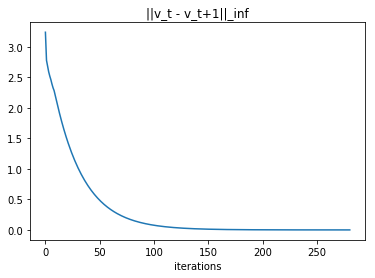

In [246]:
env = Environment(4, 4)
print(env.policy)
error = calcValueFunction(env, 0.98)
plt.plot(error)
plt.title("||v_t - v_t+1||_inf")
plt.xlabel("iterations")
plt.show()

> **Observation**: ||v_t - v_t+1||_inf is decreasing with iteration

## 2. Value Iteration to find optimal Value Function and then Optimal Policy